# 청와대 청원 크롤링

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import requests
from bs4 import BeautifulSoup


In [3]:
url = 'https://www1.president.go.kr/petitions/best'

In [4]:
res = requests.get(url)
soup = BeautifulSoup(res.text, 'html.parser')
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge, chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width,initial-scale=1.0,minimum-scale=1.0,maximum-scale=1.0" name="viewport"/>
<meta content="#082e59" name="theme-color"/>
<meta content="나라를 나라답게, 국민과 함께 갑니다." name="description">
<meta content="청와대, 대통령비서실, 대통령, 한국, 대한민국, 대한민국 정부, president.go.kr, 靑瓦臺, 19대, 문재인" name="keywords">
<meta content="청와대 (CHEONGWADAE)" name="author">
<meta content="telephone=no" name="format-detection">
<meta content="website" property="og:type"/>
<meta content="추천순 청원 목록 1페이지 &gt;  대한민국 청와대" property="og:title"/>
<meta content="https://www1.president.go.kr/petitions/best?page=1" property="og:url"/>
<meta content="대한민국 청와대" property="og:site_name"/>
<meta content="나라를 나라답게, 국민과 함께 갑니다." property="og:description"/>
<meta content="http://www.president.go.kr/css/favicon_400x210.png" property="og:image"/>
<meta content="https://www1.president.go.kr/petit

In [5]:
# 전체 경로
path = 'div.cs_area > div > div > div.board.text > div.b_list.category > div.bl_body '
tags = soup.select(path)
tags[0]

<div class="bl_body">
<ul>
<li>
<div class="bl_wrap">
<div class="bl_category cs"><span class="sound_only">분류 </span> 정치개혁</div>
<div class="bl_subject">
<a class="cb" href="/petitions/604660?navigation=best"><span class="sound_only">제목 </span>윤석열 당선자의 대장동 부산저축은행 부실수사 봐주기 의혹과 김건희의 주가조작 실체의 진상조…</a>
</div>
<span class="sound_only">청원만료 </span><div class="bl_date light">22-04-10</div>
<div class="bl_agree cb wv_agree">
<span class="sound_only">참여인원 </span>542,911명
												</div>
</div>
</li>
<li>
<div class="bl_wrap">
<div class="bl_category cs"><span class="sound_only">분류 </span> 외교/통일/국방</div>
<div class="bl_subject">
<a class="cb" href="/petitions/604773?navigation=best"><span class="sound_only">제목 </span>윤석열 당선인 집무실 만들고자, 국가안전 중추인 국방부를 강압 이전하여, 국민의 혈세 수천…</a>
</div>
<span class="sound_only">청원만료 </span><div class="bl_date light">22-04-16</div>
<div class="bl_agree cb wv_agree">
<span class="sound_only">참여인원 </span>529,551명
												</div>
</div>
</li>
<li>
<div class="bl_wrap"

In [6]:
# 분류 

cate = tags[0].select('ul > li > div > div.bl_category.cs')[0].text.split(' ')[2]
cate

'정치개혁'

In [7]:
# 제목
title = tags[0].select('ul > li > div > div.bl_subject > a')[0].text
title

'제목 윤석열 당선자의 대장동 부산저축은행 부실수사 봐주기 의혹과 김건희의 주가조작 실체의 진상조…'

In [8]:
# 만료일

end_date = tags[0].select('ul > li > div > div.bl_date.light')[0].text
end_date

'22-04-10'

In [9]:
# 참여인원
import re
num = tags[0].select('ul > li > div > div.bl_agree.cb.wv_agree')[0].text.split(' ')[1]
num_p = re.sub('[^명1-9,]','',num)
num_p

'542,911명'

In [10]:
# main url
main_url = 'https://www1.president.go.kr'

In [11]:
# url_sub
url_sub = tags[0].select('ul > li > div > div.bl_subject > a')[0]['href']
print(url_sub)

#total url
total_url = main_url + url_sub
total_url

# https://www1.president.go.kr /petitions/604660?navigation=best

/petitions/604660?navigation=best


'https://www1.president.go.kr/petitions/604660?navigation=best'

In [12]:
# 세부내용 

res1 = requests.get(total_url)
soup1 = BeautifulSoup(res1.text, 'html.parser')
soup1

<!DOCTYPE html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge, chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width,initial-scale=1.0,minimum-scale=1.0,maximum-scale=1.0" name="viewport"/>
<meta content="#082e59" name="theme-color"/>
<meta content="나라를 나라답게, 국민과 함께 갑니다." name="description">
<meta content="청와대, 대통령비서실, 대통령, 한국, 대한민국, 대한민국 정부, president.go.kr, 靑瓦臺, 19대, 문재인" name="keywords">
<meta content="청와대 (CHEONGWADAE)" name="author">
<meta content="telephone=no" name="format-detection">
<meta content="website" property="og:type"/>
<meta content="윤석열 당선자의 대장동 부산저축은행 부실수사 봐주기 의혹과 김건희의 주가조작 실체의 진상조사 확인을 위한 청원입니다. &gt; 대한민국 청와대" property="og:title"/>
<meta content="https://www1.president.go.kr/petitions/604660" property="og:url"/>
<meta content="대한민국 청와대" property="og:site_name"/>
<meta content="나라를 나라답게, 국민과 함께 갑니다." property="og:description"/>
<meta content="http://www.president.go.kr/css/favicon_400x210.png" property="og:image"/>
<meta

In [70]:
## request가 막혀 미리 받아놓은 csv파일로 분석

# csv파일로 감정분석

In [30]:
pet = pd.read_csv('./data/petition.csv')
pet

,article_id,start,end,answered,votes,category,title,content
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
...,...,...,...,...,...,...,...,...
377751,492039,2019-01-09,2019-02-08,0,48,인권/성평등,박종철 의원. 폭행구속수사 및 의원직 박탈 청원합니다,나라돈으로 해외연수가서 현지 동반 가이드를 때려 안경 파편이 얼굴이 꽂혔답니다. C...
377752,492040,2019-01-09,2019-02-08,0,5,정치개혁,각 정상들은 들으시요 국회의원을 학력과 무관한 양심 및 윤리가 있는 서민이 되어...,각 정당은 현재 국회의원 개개인을 심사하면 지탄받은 사람이 국\n회를 장악하고 있습...
377753,492041,2019-01-09,2019-02-08,0,1,외교/통일/국방,남한땅에 옥류관을 오픈해주세요,말그대로 옥류관을 여기서 열면 진짜 재미있고 신나는 일이 일어날것 같은 느낌이 듭니...
377754,492042,2019-01-09,2019-02-08,0,4,정치개혁,임종석실장님 수고많으셨습니다.,범죄정권이후 많은 어려움을 갖고 시작한 국민의정부.\n저급한 자칭 보수단체와 한국당...


## csv파일 전처리

In [31]:
pet = pet.sample(frac=0.1).copy()
pet.head()

,article_id,start,end,answered,votes,category,title,content
84218,95001,2018-01-14,2018-02-13,0,2,미래,가상화퍠,가상화폐는 브럭체인 기반으로 미래의 성장동력 임에도 불구하고 폐쇄 운운 하늗것은 ...
375338,488888,2019-01-06,2019-02-05,0,0,미래,이나라애서 살기 힘들 장애인,안.녕하세요 대통령님 저는 장애인 조혜순이라고합니다 제 나이는 38살...
33109,34437,2017-11-11,2017-12-11,0,0,정치개혁,이명박출국금지 구속,아집과 독선으로 국토를 절단내고 국고를 탕진한 자다. 온갖 협잡과 거짓으로 국민을 ...
207813,268592,2018-06-11,2018-07-11,0,1,기타,국가 공휴일에 학원을 가요!!,6월 13일에 안산 학원에 나옵니다. 국가 지정 임시 공휴일에 학원을 왜 나와야 ...
362573,471751,2018-12-17,2019-01-16,0,0,미래,백종원대표를 국회의원으로,어려운말말고 그냥 결론만 얘기하자면\n방송의힘도 있지만 그 가게만 잘되는게 아닌 상...


In [58]:
pet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37776 entries, 84218 to 90531
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   article_id  37776 non-null  int64          
 1   start       37776 non-null  datetime64[ns] 
 2   end         37776 non-null  datetime64[ns] 
 3   answered    37776 non-null  int64          
 4   votes       37776 non-null  int64          
 5   category    37776 non-null  object         
 6   title       37776 non-null  object         
 7   content     37776 non-null  object         
 8   duration    37776 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), int64(3), object(3), timedelta64[ns](1)
memory usage: 2.9+ MB


In [33]:
pet['start'] = pd.to_datetime(pet['start'])
pet['end'] = pd.to_datetime(pet['end'])

In [34]:
pet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37776 entries, 84218 to 90531
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   article_id  37776 non-null  int64         
 1   start       37776 non-null  datetime64[ns]
 2   end         37776 non-null  datetime64[ns]
 3   answered    37776 non-null  int64         
 4   votes       37776 non-null  int64         
 5   category    37776 non-null  object        
 6   title       37776 non-null  object        
 7   content     37776 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 2.6+ MB


In [35]:
pet['duration'] = pet['end'] - pet['start']

In [36]:
pet.head()

,article_id,start,end,answered,votes,category,title,content,duration
84218,95001,2018-01-14,2018-02-13,0,2,미래,가상화퍠,가상화폐는 브럭체인 기반으로 미래의 성장동력 임에도 불구하고 폐쇄 운운 하늗것은 ...,30 days
375338,488888,2019-01-06,2019-02-05,0,0,미래,이나라애서 살기 힘들 장애인,안.녕하세요 대통령님 저는 장애인 조혜순이라고합니다 제 나이는 38살...,30 days
33109,34437,2017-11-11,2017-12-11,0,0,정치개혁,이명박출국금지 구속,아집과 독선으로 국토를 절단내고 국고를 탕진한 자다. 온갖 협잡과 거짓으로 국민을 ...,30 days
207813,268592,2018-06-11,2018-07-11,0,1,기타,국가 공휴일에 학원을 가요!!,6월 13일에 안산 학원에 나옵니다. 국가 지정 임시 공휴일에 학원을 왜 나와야 ...,30 days
362573,471751,2018-12-17,2019-01-16,0,0,미래,백종원대표를 국회의원으로,어려운말말고 그냥 결론만 얘기하자면\n방송의힘도 있지만 그 가게만 잘되는게 아닌 상...,30 days


In [37]:
# 30일 이상 게시가 되고, answer을 받은 청원목록

In [38]:
pet.info() # duration의 데이터타입 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37776 entries, 84218 to 90531
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   article_id  37776 non-null  int64          
 1   start       37776 non-null  datetime64[ns] 
 2   end         37776 non-null  datetime64[ns] 
 3   answered    37776 non-null  int64          
 4   votes       37776 non-null  int64          
 5   category    37776 non-null  object         
 6   title       37776 non-null  object         
 7   content     37776 non-null  object         
 8   duration    37776 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), int64(3), object(3), timedelta64[ns](1)
memory usage: 2.9+ MB


In [39]:
pet[(pet['duration'] >= '30 days') & (pet['answered']==1)]

,article_id,start,end,answered,votes,category,title,content,duration
131327,157046,2018-03-03,2018-04-02,1,222770,인권/성평등,단역배우 자매 자살 사건 제발 재조사를 해주세여.,http://news.naver.com/main/read.nhn?mode=LSD&m...,30 days
43992,45581,2017-11-17,2017-12-17,1,281985,보건복지,"권역외상센터 (이국종 교수님) 추가적, 제도적, 환경적, 인력 지원","청원사항)\n중증외상분야의 추가적, 제도적, 환경적, 인력 지원 방안마련\n현 의료...",30 days
209715,270921,2018-06-14,2018-07-14,1,219987,문화/예술/체육/언론,대구 동성로/서울 시청광장 퀴어행사(동성애축제)개최를 반대합니다.,서울 시청/대구 동성로 퀴어행사(동성애축제)개최를 반대합니다.\n대구 6월 23일...,30 days
84324,95138,2018-01-14,2018-02-13,1,219395,교통/건축/국토,대전 아파트 단지내 횡단보도 교통사고..가해자의 만행과 도로교통법의 허점,1. 2017년 10월 16일 19시10분경 대전 맑은 아침 아파트 단지 내 횡단보...,30 days


In [40]:
# 분야별 청원
pet['category'].value_counts()

정치개혁           5868
기타             4633
인권/성평등         3424
안전/환경          2922
교통/건축/국토       2693
외교/통일/국방       2581
육아/교육          2515
보건복지           2288
일자리            2192
행정             1919
문화/예술/체육/언론    1742
미래             1736
경제민주화          1642
성장동력            700
반려동물            393
저출산/고령화대책       362
농산어촌            166
Name: category, dtype: int64

<AxesSubplot:>

C:\Users\21ckw\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\21ckw\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\21ckw\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\21ckw\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\21ckw\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\21ckw\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53440 missing from c

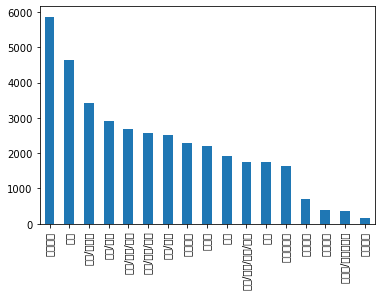

In [41]:
pet['category'].value_counts().plot(kind='bar')

## pet_by_moon 데이터프레임 설정

In [114]:
pet_by_moon = pet.sort_values('start')
pet_by_moon

,article_id,start,end,answered,votes,category,title,content,duration
27,49,2017-08-19,2017-11-17,0,27,일자리,공정한사회 절차가 바른사회가 되기를 원합니다.,문재인대통령과 교육부장관님!\n교사 정규직은 임용고시라는 제도를 통해 정교사가 될 ...,90 days
32,54,2017-08-19,2017-08-26,0,144,일자리,공정한 기회 균등이 보장되는 사회,안녕하십니까.저는 인천에서 지방으로 전출을 희망하는 별거 부부이자 중등교사입니다. ...,7 days
35,58,2017-08-19,2017-11-17,0,21,일자리,국토교통부와 한국주택협회가 행한 부당한 행위와 권력남용에 대한 내용을 청원드립니다.,안녕하세요? 존경하고 지지하는 문재인 대통령님!\n저는 성남시 분당구 정자동 주택전...,90 days
41,64,2017-08-20,2017-09-04,0,1,육아/교육,대한민국 학원에대한 법을 신설하여주십쇼,안녕하십니까!\n저는 대구에거주하고 중학교3학년인 학생입니다.... 저는 다름이 아...,15 days
66,89,2017-08-20,2017-11-18,0,1101,일자리,고용노동부 일반상담원 처우개선을 위한 예산편성 촉구 청원서,문재인정부 출범 100일을 맞이하는 기자회견이 8월17일 청와대에서 열리고 지지율은...,90 days
...,...,...,...,...,...,...,...,...,...
376805,490873,2019-01-09,2019-02-08,0,7,보건복지,전 아들만 둘 있습니다,전 아들만 둘 있습니다\n둘다\n이왕이면\n이웃을 살피고\n누구가를 도우면 사는것도...,30 days
377425,491616,2019-01-09,2019-02-08,0,1,문화/예술/체육/언론,도쿄올림픽 불참 보이콧 청원합니다.,일본의 군국주의 부활을 위한 몸짓이 갈수록 심화되고 있습니다.\n우방국간 상호 과실...,30 days
377159,491317,2019-01-09,2019-02-08,0,61,인권/성평등,예천군 박종철 의윈 물러나세요. 거짓말장이 폭행범입니다,국민을 함부로 대하는 의원은 자격이 없으며 물러남이 마땅합 니다. 거짓말장이. 폭...,30 days
377548,491786,2019-01-09,2019-02-08,0,2,성장동력,"30명 40명 규모 미니의대,약대,치대 정원 100명 이상 으로 늘려야",30명\n40명 규모의\n미니 약대\n미니 의대\n미니 치대\n미니 한의대 등을\n...,30 days


## 월별 등장빈도가 가장 많은 상위 5개 단어를 출력

In [115]:
# 년+월 열 만들어주기
pet_by_moon['yearmonth'] = pet_by_moon['start'].astype('str').apply(lambda x : x[:7])
pet_by_moon.head()

,article_id,start,end,answered,votes,category,title,content,duration,yearmonth
27,49,2017-08-19,2017-11-17,0,27,일자리,공정한사회 절차가 바른사회가 되기를 원합니다.,문재인대통령과 교육부장관님!\n교사 정규직은 임용고시라는 제도를 통해 정교사가 될 ...,90 days,2017-08
32,54,2017-08-19,2017-08-26,0,144,일자리,공정한 기회 균등이 보장되는 사회,안녕하십니까.저는 인천에서 지방으로 전출을 희망하는 별거 부부이자 중등교사입니다. ...,7 days,2017-08
35,58,2017-08-19,2017-11-17,0,21,일자리,국토교통부와 한국주택협회가 행한 부당한 행위와 권력남용에 대한 내용을 청원드립니다.,안녕하세요? 존경하고 지지하는 문재인 대통령님!\n저는 성남시 분당구 정자동 주택전...,90 days,2017-08
41,64,2017-08-20,2017-09-04,0,1,육아/교육,대한민국 학원에대한 법을 신설하여주십쇼,안녕하십니까!\n저는 대구에거주하고 중학교3학년인 학생입니다.... 저는 다름이 아...,15 days,2017-08
66,89,2017-08-20,2017-11-18,0,1101,일자리,고용노동부 일반상담원 처우개선을 위한 예산편성 촉구 청원서,문재인정부 출범 100일을 맞이하는 기자회견이 8월17일 청와대에서 열리고 지지율은...,90 days,2017-08


## 자연어 전처리 

In [116]:
# konlpy 작동확인
from konlpy.tag import Komoran
kor = Komoran()

In [117]:
kor.nouns('가슴 아파도 나 이렇게 웃어요')

['가슴']

#### 한글+공백 만 남기기

In [118]:
import re
def text_clean(doc):
    doc = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ ]','',doc)
    doc = re.sub('\s+',' ',doc)
    return doc

In [119]:
# 제거 후 공백이 한칸 남음 -> 빈값 처리해줘야함
te = 'a nnndfsdf; erwk3      dkf;  '
text_clean(te)

' '

In [120]:
pet_by_moon['clean_content'] = pet_by_moon['content'].apply(text_clean)

In [121]:
pet_by_moon.head()

,article_id,start,end,answered,votes,category,title,content,duration,yearmonth,clean_content
27,49,2017-08-19,2017-11-17,0,27,일자리,공정한사회 절차가 바른사회가 되기를 원합니다.,문재인대통령과 교육부장관님!\n교사 정규직은 임용고시라는 제도를 통해 정교사가 될 ...,90 days,2017-08,문재인대통령과 교육부장관님교사 정규직은 임용고시라는 제도를 통해 정교사가 될 수 있...
32,54,2017-08-19,2017-08-26,0,144,일자리,공정한 기회 균등이 보장되는 사회,안녕하십니까.저는 인천에서 지방으로 전출을 희망하는 별거 부부이자 중등교사입니다. ...,7 days,2017-08,안녕하십니까저는 인천에서 지방으로 전출을 희망하는 별거 부부이자 중등교사입니다 타시...
35,58,2017-08-19,2017-11-17,0,21,일자리,국토교통부와 한국주택협회가 행한 부당한 행위와 권력남용에 대한 내용을 청원드립니다.,안녕하세요? 존경하고 지지하는 문재인 대통령님!\n저는 성남시 분당구 정자동 주택전...,90 days,2017-08,안녕하세요 존경하고 지지하는 문재인 대통령님저는 성남시 분당구 정자동 주택전시관 입...
41,64,2017-08-20,2017-09-04,0,1,육아/교육,대한민국 학원에대한 법을 신설하여주십쇼,안녕하십니까!\n저는 대구에거주하고 중학교3학년인 학생입니다.... 저는 다름이 아...,15 days,2017-08,안녕하십니까저는 대구에거주하고 중학교학년인 학생입니다 저는 다름이 아니라 어느 학생...
66,89,2017-08-20,2017-11-18,0,1101,일자리,고용노동부 일반상담원 처우개선을 위한 예산편성 촉구 청원서,문재인정부 출범 100일을 맞이하는 기자회견이 8월17일 청와대에서 열리고 지지율은...,90 days,2017-08,문재인정부 출범 일을 맞이하는 기자회견이 월일 청와대에서 열리고 지지율은 여전히 에...


In [122]:
pet_by_moon.shape

(37776, 11)

In [123]:
pet_by_moon[pet_by_moon['clean_content']==np.NaN]

,article_id,start,end,answered,votes,category,title,content,duration,yearmonth,clean_content


In [124]:
pet_by_moon[pet_by_moon['clean_content'].isnull()]

,article_id,start,end,answered,votes,category,title,content,duration,yearmonth,clean_content


#### 빈값처리

In [125]:
# 빈값 확인
pet_by_moon[pet_by_moon['clean_content']== '']

,article_id,start,end,answered,votes,category,title,content,duration,yearmonth,clean_content
5073,5114,2017-09-05,2017-12-04,0,1,안전/환경,청소년 보호법 폐지,.,90 days,2017-09,
9143,9196,2017-09-05,2017-12-04,0,0,안전/환경,천소년법 폐지해주십쇼,.,90 days,2017-09,
6459,6504,2017-09-05,2017-10-05,0,0,미래,청소년 법 폐지,ㆍ,30 days,2017-09,
3784,3825,2017-09-05,2017-09-12,0,0,정치개혁,청소년법 폐지 찬성합니다.,.,7 days,2017-09,
6443,6488,2017-09-05,2017-12-04,0,0,육아/교육,미래를 쉬게 할 수 없어요,123,90 days,2017-09,
11380,11435,2017-09-06,2017-12-05,0,0,안전/환경,청소년법폐지해주세요,..,90 days,2017-09,
10173,10227,2017-09-06,2017-09-13,0,0,정치개혁,소년법 폐지 동의,.,7 days,2017-09,
12996,13057,2017-09-09,2017-12-08,0,1,인권/성평등,청소년보호법 폐지,http://www1.president.go.kr/petitions/1785?nav...,90 days,2017-09,
13508,13575,2017-09-12,2017-09-19,0,0,미래,.,-,7 days,2017-09,
14434,14519,2017-09-18,2017-10-18,0,0,외교/통일/국방,fwqfwqfe,fwqfwqef,30 days,2017-09,


In [127]:
# pet_by_moon[pet_by_moon['clean_content'].apply(bool) == False]

In [95]:
# len(pet_by_moon[pet_by_moon['clean_content'].apply(bool) == False])

57

In [96]:
len(pet_by_moon[pet_by_moon['clean_content']== ''])

57

In [128]:
pet_by_moon[pet_by_moon['clean_content']== ' ']

,article_id,start,end,answered,votes,category,title,content,duration,yearmonth,clean_content
54381,56545,2017-12-02,2018-01-01,0,9,기타,DELETE AND CLOSE MAMA (MNET),I want the MAMA (MNET) event to be immediately...,30 days,2017-12,
54721,56952,2017-12-02,2018-01-01,0,2,기타,đề nghị xóa bỏ mama,đề nghị xóa bỏ mama bởi vì quá vô lí EXO chúng...,30 days,2017-12,
54400,56564,2017-12-02,2018-01-01,0,2,문화/예술/체육/언론,close mnet,close mnet,30 days,2017-12,
198092,254553,2018-05-30,2018-06-29,0,1,외교/통일/국방,Hello mr. Moon Jae-in,I'm very poor country's president.\nI hope kor...,30 days,2018-05,


In [129]:
# 빈값 제거
pet_by_moon = pet_by_moon[pet_by_moon['clean_content']!= '']

In [130]:
# 제거확인
pet_by_moon[pet_by_moon['clean_content']== '']

,article_id,start,end,answered,votes,category,title,content,duration,yearmonth,clean_content


In [131]:
pet_by_moon.shape

(37719, 11)

In [132]:
# ' ' 빈값 없애주기
pet_by_moon[pet_by_moon['clean_content']== ' ']

,article_id,start,end,answered,votes,category,title,content,duration,yearmonth,clean_content
54381,56545,2017-12-02,2018-01-01,0,9,기타,DELETE AND CLOSE MAMA (MNET),I want the MAMA (MNET) event to be immediately...,30 days,2017-12,
54721,56952,2017-12-02,2018-01-01,0,2,기타,đề nghị xóa bỏ mama,đề nghị xóa bỏ mama bởi vì quá vô lí EXO chúng...,30 days,2017-12,
54400,56564,2017-12-02,2018-01-01,0,2,문화/예술/체육/언론,close mnet,close mnet,30 days,2017-12,
198092,254553,2018-05-30,2018-06-29,0,1,외교/통일/국방,Hello mr. Moon Jae-in,I'm very poor country's president.\nI hope kor...,30 days,2018-05,


In [133]:
# 빈값 제거
pet_by_moon = pet_by_moon[pet_by_moon['clean_content']!= ' ']

In [134]:
# 제거 확인
pet_by_moon[pet_by_moon['clean_content']== ' ']

,article_id,start,end,answered,votes,category,title,content,duration,yearmonth,clean_content


#### 토큰화

In [136]:
# 빈값 처리를 안해주면 Java오류가 남!
# 7분 시간 소요 왜 mecab을 쓰려고 하는 지 알 것 같다

clean_tokens = []
for w in pet_by_moon['clean_content']:
    token = kor.nouns(w)
    clean_tokens.append(token)
    
pet_by_moon['clean_tokens']= clean_tokens

In [171]:
pet_by_moon.head()

,article_id,start,end,answered,votes,category,title,content,duration,yearmonth,clean_content,clean_tokens
17,38,2017-08-19,2017-08-26,0,0,외교/통일/국방,한중관계 사드 갈등 해소방법 찾았습니다.,문재인 대통령님 한중관계 사드 갈등 해소방법 찾았습니다.\n시진핑 주석 한테 이렇게...,7 days,2017-08,문재인 대통령님 한중관계 사드 갈등 해소방법 찾았습니다시진핑 주석 한테 이렇게 말해...,"[문재인, 대통령, 중, 관계, 사드, 갈등, 해소, 방법, 습, 니다, 시진핑, ..."
36,59,2017-08-19,2017-10-18,0,2,반려동물,"유기동물 재발방지를 위한 반려동물 번식업, 반려동물 판매업, 반려동물 등록법 개정 요구",안녕하세요.\n사람과 동물과 자연을 소중하게 생각하는 국민으로서 청원합니다.\n우리...,60 days,2017-08,안녕하세요사람과 동물과 자연을 소중하게 생각하는 국민으로서 청원합니다우리나라는 매년...,"[안녕하세요, 사람과, 동물, 자연, 생각, 국민, 청원, 합, 니다, 우리나라, ..."
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...,90 days,2017-08,현 정부에 국민들이 가장 원하는 것은 부패척결입니다 우리 사회에 각종 비리들이 많은...,"[정부, 국민, 것, 부패, 척결, 사회, 각종, 비리, 내부, 고발, 내부고발자,..."
5,26,2017-08-19,2017-08-26,0,2,보건복지,보건복지부 부령 제339호중 “특수의료장비 운영에 관한 규칙” 중 불합리한 행정제...,청원인 왕 기 운\n서울 도봉구 창동 삼성아파트 101-1103호\n청원취지\n보...,7 days,2017-08,청원인 왕 기 운서울 도봉구 창동 삼성아파트 호청원취지보건복지부 부령 제호중 특수의...,"[청원, 왕, 기, 서울, 도봉구, 창동, 삼성, 아파트, 호, 청원, 취지, 보건..."
122,146,2017-08-20,2017-09-04,0,15,교통/건축/국토,8.2 부동산 대책 중 재개발/재건축 관련 청원입니다.,안녕하세요. 요즘 참 바람잘 날 없는 대한민국입니다. 대외와 대내가 모두 많은 위협...,15 days,2017-08,안녕하세요 요즘 참 바람잘 날 없는 대한민국입니다 대외와 대내가 모두 많은 위협과 ...,"[안녕하세요, 요즘, 바람, 날, 대한민국, 대외, 대내, 위협, 도전, 직면, 와..."


#### 빈값처리

In [137]:
pet_by_moon[pet_by_moon['clean_tokens'] == '' ]

,article_id,start,end,answered,votes,category,title,content,duration,yearmonth,clean_content,clean_tokens


In [113]:
# 빈 리스트 찾기
pet_by_moon[pet_by_moon['clean_tokens'].apply(bool) == False]

,article_id,start,end,answered,votes,category,title,content,duration,yearmonth,clean_content,clean_tokens
1538,1568,2017-09-02,2017-12-01,0,0,보건복지,ㄷ,ㄱㄴ,90 days,2017-09,ㄱㄴ,[]
2598,2637,2017-09-04,2017-09-19,0,0,안전/환경,청소년 보호법 폐지해주세요 제발,제발요,15 days,2017-09,제발요,[]
3385,3426,2017-09-04,2017-12-03,0,0,인권/성평등,소년법 폐지 또는 개안을 원합니다.,제발 들어주세요,90 days,2017-09,제발 들어주세요,[]
3487,3528,2017-09-05,2017-12-04,0,0,인권/성평등,소년법 폐지 또는 개안을 원합니다.,제발 들어주세요,90 days,2017-09,제발 들어주세요,[]
9123,9176,2017-09-05,2017-09-12,0,0,외교/통일/국방,나라,ㅇ,7 days,2017-09,ㅇ,[]
...,...,...,...,...,...,...,...,...,...,...,...,...
367109,477780,2018-12-24,2019-01-23,0,1,안전/환경,핸드폰 해킹범 및 사주범을 사형수 사형범으로 취급하여 주십시요,ㅡ ㅡ,30 days,2018-12,ㅡ ㅡ,[]
368255,479311,2018-12-26,2019-01-25,0,3,외교/통일/국방,모병제,우리나라도모병제를시행해야됩니다\n20대꽃다운청춘들이무슨죄로군이란감옥으로끌려가야되나요...,30 days,2018-12,우리나라도모병제를시행해야됩니다대꽃다운청춘들이무슨죄로군이란감옥으로끌려가야되나요푼돈주면...,[]
372135,484553,2019-01-01,2019-01-31,0,1,정치개혁,정치,이것참,30 days,2019-01,이것참,[]
375574,489198,2019-01-07,2019-02-06,0,4,보건복지,세상살기싫어요,병신돼니모든것포기하고싶네요생활보호대상자돼서지원금나온것쓸데너무없고늙어서이혼후홀로남았는...,30 days,2019-01,병신돼니모든것포기하고싶네요생활보호대상자돼서지원금나온것쓸데너무없고늙어서이혼후홀로남았는...,[]


In [138]:
# 빈값 제거
pet_by_moon = pet_by_moon[pet_by_moon['clean_tokens'].apply(bool) == True]

In [139]:
# 제거 확인
pet_by_moon[pet_by_moon['clean_tokens'].apply(bool) == False]


,article_id,start,end,answered,votes,category,title,content,duration,yearmonth,clean_content,clean_tokens


#### stopword 제외시키기

In [140]:
st_df = pd.read_csv('./data/stopwords-ko.txt',header = None)
st_list = st_df[0].tolist()

def remove_stwords(doc):
    doc = [w for w in doc if w not in st_list]
    doc = ' '.join(doc)
    return doc

In [141]:
pet_by_moon['remove_clean_tokens'] = pet_by_moon['clean_tokens'].apply(remove_stwords)

C:\Users\21ckw\AppData\Local\Temp/ipykernel_17412/3851306810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pet_by_moon['remove_clean_tokens'] = pet_by_moon['clean_tokens'].apply(remove_stwords)


In [142]:
pet_by_moon.head()

,article_id,start,end,answered,votes,category,title,content,duration,yearmonth,clean_content,clean_tokens,remove_clean_tokens
27,49,2017-08-19,2017-11-17,0,27,일자리,공정한사회 절차가 바른사회가 되기를 원합니다.,문재인대통령과 교육부장관님!\n교사 정규직은 임용고시라는 제도를 통해 정교사가 될 ...,90 days,2017-08,문재인대통령과 교육부장관님교사 정규직은 임용고시라는 제도를 통해 정교사가 될 수 있...,"[문재인, 대통령, 교육부, 장관, 교사, 정규, 직, 임용, 고시, 제도, 정교,...",문재인 대통령 교육부 장관 교사 정규 직 임용 고시 제도 정교 사가 수 기간 교사 ...
32,54,2017-08-19,2017-08-26,0,144,일자리,공정한 기회 균등이 보장되는 사회,안녕하십니까.저는 인천에서 지방으로 전출을 희망하는 별거 부부이자 중등교사입니다. ...,7 days,2017-08,안녕하십니까저는 인천에서 지방으로 전출을 희망하는 별거 부부이자 중등교사입니다 타시...,"[안녕하십니까, 인천, 지방, 전출, 희망, 별거, 부부, 중등, 교사, 시도, 전...",안녕하십니까 인천 지방 전출 희망 별거 부부 중등 교사 시도 전출 성공 하루 가족 ...
35,58,2017-08-19,2017-11-17,0,21,일자리,국토교통부와 한국주택협회가 행한 부당한 행위와 권력남용에 대한 내용을 청원드립니다.,안녕하세요? 존경하고 지지하는 문재인 대통령님!\n저는 성남시 분당구 정자동 주택전...,90 days,2017-08,안녕하세요 존경하고 지지하는 문재인 대통령님저는 성남시 분당구 정자동 주택전시관 입...,"[안녕하세요, 존경, 지지, 문재인, 대통령, 성남시, 분당구, 정자동, 주택, 전...",안녕하세요 존경 지지 문재인 대통령 성남시 분당구 정자동 주택 전시관 입 점 업체 ...
41,64,2017-08-20,2017-09-04,0,1,육아/교육,대한민국 학원에대한 법을 신설하여주십쇼,안녕하십니까!\n저는 대구에거주하고 중학교3학년인 학생입니다.... 저는 다름이 아...,15 days,2017-08,안녕하십니까저는 대구에거주하고 중학교학년인 학생입니다 저는 다름이 아니라 어느 학생...,"[안녕하십니까, 대구, 거주, 중학교, 학년, 학생, 학생, 학원, 학원, 이란, ...",안녕하십니까 대구 거주 중학교 학년 학생 학생 학원 학원 이란 자체 학생 공부 밑 ...
66,89,2017-08-20,2017-11-18,0,1101,일자리,고용노동부 일반상담원 처우개선을 위한 예산편성 촉구 청원서,문재인정부 출범 100일을 맞이하는 기자회견이 8월17일 청와대에서 열리고 지지율은...,90 days,2017-08,문재인정부 출범 일을 맞이하는 기자회견이 월일 청와대에서 열리고 지지율은 여전히 에...,"[문재인, 정부, 출범, 일, 기자회견, 월, 청와대, 지지, 고공, 행진, 있다,...",문재인 정부 출범 기자회견 청와대 지지 고공 행진 그간 사회 만연 적 폐 청산 소통...


In [212]:
# 전처리하는 중 빈리스트값들이 들어가 있는것을 확인

pet_by_moon[pet_by_moon['clean_tokens'].apply(bool) == False]

,article_id,start,end,answered,votes,category,title,content,duration,yearmonth,clean_content,clean_tokens,remove_clean_tokens
2817,2858,2017-09-04,2017-09-11,0,0,안전/환경,부산청소년폭행 강력하게 처벌을 청원합니다,너무하네요 진짜,7 days,2017-09,너무하네요 진짜,[],
3387,3428,2017-09-04,2017-12-03,0,0,인권/성평등,소년법 폐지 또는 개안을 원합니다.,제발 들어주세요,90 days,2017-09,제발 들어주세요,[],
2827,2868,2017-09-04,2017-09-11,0,0,안전/환경,부산청소년폭행 강력하게 처벌을 청원합니다,너무하네요 진짜,7 days,2017-09,너무하네요 진짜,[],
3389,3430,2017-09-04,2017-12-03,0,0,인권/성평등,소년법 폐지 또는 개안을 원합니다.,제발 들어주세요,90 days,2017-09,제발 들어주세요,[],
2308,2346,2017-09-04,2017-09-11,0,0,인권/성평등,청소년 보호법 폐지해주세요~,페지해주세요!,7 days,2017-09,페지해주세요,[],
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371856,484175,2019-01-01,2019-01-31,0,4,정치개혁,국회법안,법안처리가당리당약에의해\n처리가되지않의무로\n일정기간지나면자동상정되어\n대표국민표결...,30 days,2019-01,법안처리가당리당약에의해처리가되지않의무로일정기간지나면자동상정되어대표국민표결로과반수통과...,[],
372943,485561,2019-01-02,2019-02-01,0,45,보건복지,강북 삼성병원 의료진 사망사건에 관련 한 의료안정성을 위한청윈,동일합니다,30 days,2019-01,동일합니다,[],
372950,485569,2019-01-02,2019-02-01,0,0,기타,어중간한 자영업자 죽이는 정부 대책?,ㅜㅜ,30 days,2019-01,ㅜㅜ,[],
374341,487418,2019-01-04,2019-02-03,0,14,정치개혁,시의원.군의원,"예천에서일어난,군의원추태사건\n정말나라망신아닌지요.\n군믽시민들세금의로연수란명목으로...",30 days,2019-01,예천에서일어난군의원추태사건정말나라망신아닌지요군믽시민들세금의로연수란명목으로여행가면서접...,[],


#### 빈값처리

In [144]:
# 빈값 확인
pet_by_moon[pet_by_moon['remove_clean_tokens']== '']

,article_id,start,end,answered,votes,category,title,content,duration,yearmonth,clean_content,clean_tokens,remove_clean_tokens
1393,1422,2017-09-02,2017-12-01,0,1,미래,가식은 그만,100일 넘도록 한게 모 있죠?,90 days,2017-09,일 넘도록 한게 모 있죠,[일],
2506,2545,2017-09-04,2017-12-03,0,0,인권/성평등,"제 아이에게 ""맞고 다니지말아라. 청소년 보호법이 있단다""라고 가르치고 싶지 않습니다.",이상입니다.,90 days,2017-09,이상입니다,[이상],
30031,31337,2017-11-10,2017-12-10,0,1,인권/성평등,학교폭력,하,30 days,2017-11,하,[하],
30150,31466,2017-11-11,2017-12-11,0,1,일자리,한국전력공사 부산 전체 구조조정 해주십쇼,솔직히 다 날로먹는것을 아닙니까?,30 days,2017-11,솔직히 다 날로먹는것을 아닙니까,[것],
112487,134992,2018-02-09,2018-03-11,0,6,반려동물,문재인은 모하냐 김여정 영접하러 안가고,직접 안가고 모하냐.,30 days,2018-02,직접 안가고 모하냐,[모],
364140,473742,2018-12-19,2019-01-18,0,1,교통/건축/국토,설거지,어질러놓은것부터 치우고 다른일보셔야지 요,30 days,2018-12,어질러놓은것부터 치우고 다른일보셔야지 요,"[것, 일]",


In [145]:
# 빈값 확인
pet_by_moon[pet_by_moon['remove_clean_tokens']== ' '] # 없음

,article_id,start,end,answered,votes,category,title,content,duration,yearmonth,clean_content,clean_tokens,remove_clean_tokens


In [146]:
# 빈값 확인
pet_by_moon[pet_by_moon['remove_clean_tokens'].apply(bool)== False] # ''과 결과 같음

,article_id,start,end,answered,votes,category,title,content,duration,yearmonth,clean_content,clean_tokens,remove_clean_tokens
1393,1422,2017-09-02,2017-12-01,0,1,미래,가식은 그만,100일 넘도록 한게 모 있죠?,90 days,2017-09,일 넘도록 한게 모 있죠,[일],
2506,2545,2017-09-04,2017-12-03,0,0,인권/성평등,"제 아이에게 ""맞고 다니지말아라. 청소년 보호법이 있단다""라고 가르치고 싶지 않습니다.",이상입니다.,90 days,2017-09,이상입니다,[이상],
30031,31337,2017-11-10,2017-12-10,0,1,인권/성평등,학교폭력,하,30 days,2017-11,하,[하],
30150,31466,2017-11-11,2017-12-11,0,1,일자리,한국전력공사 부산 전체 구조조정 해주십쇼,솔직히 다 날로먹는것을 아닙니까?,30 days,2017-11,솔직히 다 날로먹는것을 아닙니까,[것],
112487,134992,2018-02-09,2018-03-11,0,6,반려동물,문재인은 모하냐 김여정 영접하러 안가고,직접 안가고 모하냐.,30 days,2018-02,직접 안가고 모하냐,[모],
364140,473742,2018-12-19,2019-01-18,0,1,교통/건축/국토,설거지,어질러놓은것부터 치우고 다른일보셔야지 요,30 days,2018-12,어질러놓은것부터 치우고 다른일보셔야지 요,"[것, 일]",


In [147]:
# 빈값 제거

pet_by_moon = pet_by_moon[pet_by_moon['remove_clean_tokens']!= '']

In [149]:
# 제거 확인
pet_by_moon[pet_by_moon['remove_clean_tokens']== '']

,article_id,start,end,answered,votes,category,title,content,duration,yearmonth,clean_content,clean_tokens,remove_clean_tokens


In [154]:
# 저장하기

pet_tokens = pd.Series(pet_by_moon['remove_clean_tokens'], index=pet_by_moon.index)
print(pet_tokens)
pet_tokens.to_csv('./data/pet_tokens.csv')

27        문재인 대통령 교육부 장관 교사 정규 직 임용 고시 제도 정교 사가 수 기간 교사 ...
32        안녕하십니까 인천 지방 전출 희망 별거 부부 중등 교사 시도 전출 성공 하루 가족 ...
35        안녕하세요 존경 지지 문재인 대통령 성남시 분당구 정자동 주택 전시관 입 점 업체 ...
41        안녕하십니까 대구 거주 중학교 학년 학생 학생 학원 학원 이란 자체 학생 공부 밑 ...
66        문재인 정부 출범 기자회견 청와대 지지 고공 행진 그간 사회 만연 적 폐 청산 소통...
                                ...                        
376805    아들 다이 왕이 면 이웃 생각 간호대 월급 백도 안 기본급 오후 근무 월급 밥 물 ...
377425    일본 군국주의 부활 몸짓 심화 우방국 간 상호 과실 오해 갈등 해소 내부 결속 수단...
377159                      국민 의원 자격 합 니다 거짓말 장이 폭행 범 국민의 힘
377548    명명 규모 의미 약대 미니 의대 미니 치대 미니 의대 정원 명 명 규모 의대 규모 ...
377072    십중팔구 대학가 시대 입 니다 형편 정부 대학 교육 등록금 대신 사실 의무 교육 대...
Name: remove_clean_tokens, Length: 37513, dtype: object


## 빈도수 분석

In [155]:
pet_tokens

27        문재인 대통령 교육부 장관 교사 정규 직 임용 고시 제도 정교 사가 수 기간 교사 ...
32        안녕하십니까 인천 지방 전출 희망 별거 부부 중등 교사 시도 전출 성공 하루 가족 ...
35        안녕하세요 존경 지지 문재인 대통령 성남시 분당구 정자동 주택 전시관 입 점 업체 ...
41        안녕하십니까 대구 거주 중학교 학년 학생 학생 학원 학원 이란 자체 학생 공부 밑 ...
66        문재인 정부 출범 기자회견 청와대 지지 고공 행진 그간 사회 만연 적 폐 청산 소통...
                                ...                        
376805    아들 다이 왕이 면 이웃 생각 간호대 월급 백도 안 기본급 오후 근무 월급 밥 물 ...
377425    일본 군국주의 부활 몸짓 심화 우방국 간 상호 과실 오해 갈등 해소 내부 결속 수단...
377159                      국민 의원 자격 합 니다 거짓말 장이 폭행 범 국민의 힘
377548    명명 규모 의미 약대 미니 의대 미니 치대 미니 의대 정원 명 명 규모 의대 규모 ...
377072    십중팔구 대학가 시대 입 니다 형편 정부 대학 교육 등록금 대신 사실 의무 교육 대...
Name: remove_clean_tokens, Length: 37513, dtype: object

In [156]:
# 한글자 이상인 토큰만 모아주기

token_list = []
for token in pet_tokens:
    token1 = [t for t in token.split() if len(t)>1]
    token_list.append(token1)    

In [158]:
# 한글자 이상인 토큰 
token_list

[['문재인',
  '대통령',
  '교육부',
  '장관',
  '교사',
  '정규',
  '임용',
  '고시',
  '제도',
  '정교',
  '사가',
  '기간',
  '교사',
  '현직',
  '교사',
  '휴직',
  '병가',
  '파견',
  '기간',
  '대체',
  '교사',
  '복직',
  '계약',
  '자동',
  '해제',
  '기간',
  '교사',
  '교사',
  '자격증',
  '정식',
  '교사',
  '임용',
  '고시',
  '방법',
  '기간',
  '학교',
  '지인',
  '사람',
  '기간',
  '제도',
  '임용',
  '고시',
  '정식',
  '교사',
  '젊은이들',
  '포기',
  '임용',
  '고시',
  '전념',
  '비용',
  '경쟁',
  '시험',
  '합격',
  '유능',
  '사람',
  '정식',
  '절차',
  '정식',
  '교사',
  '임용',
  '고시',
  '교육과정',
  '교수법',
  '교수',
  '내용',
  '공부',
  '합격',
  '기간',
  '기간',
  '대체',
  '채용',
  '완전',
  '채용',
  '기간',
  '교사',
  '임용',
  '고시',
  '포기',
  '기간',
  '제로',
  '경우',
  '임용',
  '고시',
  '임용',
  '고시',
  '교사',
  '학부모',
  '고생',
  '임용',
  '대기자',
  '가슴',
  '위반',
  '정책',
  '인기',
  '영합',
  '즉흥',
  '정책',
  '포퓰리즘',
  '정책',
  '주위',
  '사람',
  '정책',
  '발언',
  '불안',
  '정도',
  '기간',
  '교사',
  '정규화',
  '상식선',
  '반대',
  '기간',
  '제도',
  '티오',
  '합격',
  '기자',
  '기간',
  '제로',
  '채용',
  '생각',
  '필요',
  '채용',
  '스포츠',
  '강사',


In [161]:
nltk.Text(token_list[0])

<Text: 문재인 대통령 교육부 장관 교사 정규 임용 고시...>

In [163]:
nltk.Text(token_list[0]).vocab()

FreqDist({'교사': 21, '기간': 17, '임용': 10, '고시': 9, '정규': 7, '제도': 6, '강사': 6, '정식': 4, '사람': 4, '채용': 4, ...})

### 청원글에서 빈도수 높은 50개 단어

In [162]:
import nltk

common_token_list = []

for tokens in token_list:
    ko = nltk.Text(tokens)
    common_tokens = ko.vocab().most_common(50)
    common_token_list.append(common_tokens)

common_token_list

[[('교사', 21),
  ('기간', 17),
  ('임용', 10),
  ('고시', 9),
  ('정규', 7),
  ('제도', 6),
  ('강사', 6),
  ('정식', 4),
  ('사람', 4),
  ('채용', 4),
  ('정책', 4),
  ('복직', 3),
  ('합격', 3),
  ('반대', 3),
  ('필요', 3),
  ('대통령', 2),
  ('교육부', 2),
  ('장관', 2),
  ('현직', 2),
  ('대체', 2),
  ('계약', 2),
  ('자격증', 2),
  ('학교', 2),
  ('포기', 2),
  ('공부', 2),
  ('제로', 2),
  ('학부모', 2),
  ('스포츠', 2),
  ('무기', 2),
  ('전문직', 2),
  ('평등', 2),
  ('공정', 2),
  ('희망', 2),
  ('학생', 2),
  ('교육', 2),
  ('문재인', 1),
  ('정교', 1),
  ('사가', 1),
  ('휴직', 1),
  ('병가', 1),
  ('파견', 1),
  ('자동', 1),
  ('해제', 1),
  ('방법', 1),
  ('지인', 1),
  ('젊은이들', 1),
  ('전념', 1),
  ('비용', 1),
  ('경쟁', 1),
  ('시험', 1)],
 [('교사', 3),
  ('정규화', 3),
  ('경우', 3),
  ('임용', 3),
  ('고사', 3),
  ('공정', 3),
  ('공부', 3),
  ('전출', 2),
  ('가족', 2),
  ('지금', 2),
  ('문제', 2),
  ('기간', 2),
  ('강사', 2),
  ('인정', 2),
  ('공채', 2),
  ('제도', 2),
  ('기회', 2),
  ('합격', 2),
  ('사회', 2),
  ('결과', 2),
  ('무시', 2),
  ('안녕하십니까', 1),
  ('인천', 1),
  ('지방', 1),
  ('희망', 1),
  ('별거'

In [ ]:
### 특정 단어가 포함된 빈도수 

In [164]:
tokens_counts = []
keyword = '경제'

for tokens in token_list:
    token_count = tokens.count(keyword)
    tokens_counts.append(token_count)
    
tokens_counts

[0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 38,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,

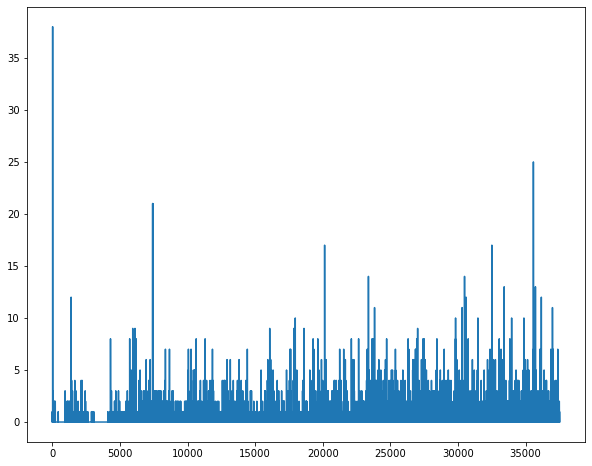

In [172]:
plt.figure(figsize=(10,8))
plt.plot(tokens_counts)